<a href="https://colab.research.google.com/github/cluePrints/fastai-v3-notes/blob/master/fastai3_lesson3_imdb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
import tensorflow as tf
device = tf.test.gpu_device_name()
assert 'GPU' in device, "Expected device ({device}) to be GPU. Please follow Runtime > Change runtime type > GPU".format(device=device)

In [0]:
import pandas as pd
from fastai.text import *

In [0]:
imdb_sample_path = untar_data(URLs.IMDB_SAMPLE)
imdb_sample_path

PosixPath('/root/.fastai/data/imdb_sample')

In [0]:
ls {imdb_sample_path}

texts.csv


In [0]:
df_sample = pd.read_csv(imdb_sample_path/'texts.csv')
df_sample.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [0]:
text_list = TextList.from_df(df_sample, cols=['text'])
type(text_list)

fastai.text.data.TextList

In [0]:
split_list =  text_list.random_split_by_pct(0.1)
type(split_list)

fastai.data_block.ItemLists

In [0]:
labeled_list = split_list.label_for_lm()
type(labeled_list)

fastai.data_block.LabelLists

In [0]:
data = labeled_list.databunch()

In [0]:
learner = language_model_learner(data, pretrained_model=URLs.WT103)

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


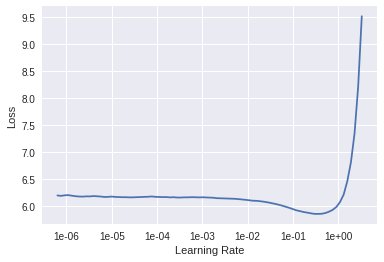

In [0]:
learner.recorder.plot()

In [0]:
# Note to self: I tried 3e-1 and that lead to accuracy decreasing
from fastai.callbacks.tracker import SaveModelCallback
save_model = SaveModelCallback(learner, name='v1')
learner.fit_one_cycle(10, max_lr=1e-1, callbacks=[save_model])

epoch,train_loss,valid_loss,accuracy
1,5.354373,4.287047,0.226690
2,4.932482,4.404041,0.227519
3,5.126788,4.790698,0.197577
4,5.402914,4.876305,0.198756
5,5.477964,4.851237,0.197258
6,5.396297,4.754571,0.206824
7,5.223401,4.657458,0.213680
8,5.030107,4.570868,0.221397
9,4.882906,4.528942,0.222226
10,4.783374,4.522286,0.222417


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


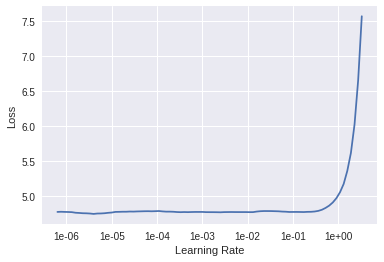

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
from fastai.callbacks.tracker import SaveModelCallback
save_model = SaveModelCallback(learner, name='v2')
learner.fit_one_cycle(10, max_lr=1e-2, callbacks=[save_model])

epoch,train_loss,valid_loss,accuracy
1,4.746241,4.208230,0.234821
2,4.655988,4.130380,0.244802
3,4.560850,4.090042,0.252009
4,4.463740,4.065066,0.255963
5,4.368773,4.049509,0.255102
6,4.297136,4.038906,0.257143
7,4.245141,4.029131,0.257749
8,4.193040,4.022723,0.259343
9,4.149073,4.020012,0.258769
10,4.131132,4.022470,0.258291


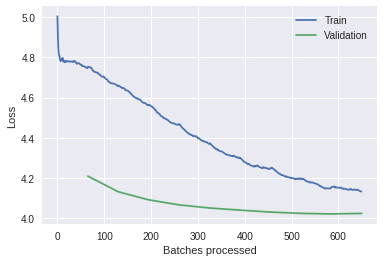

In [0]:
learner.recorder.plot_losses()

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


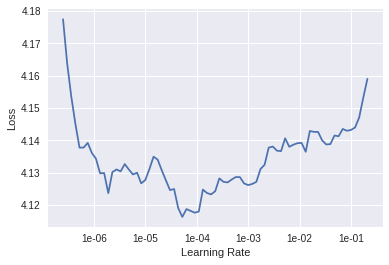

In [0]:
learner.recorder.plot(skip_start=5, skip_end=20)

In [0]:
from fastai.callbacks.tracker import SaveModelCallback
save_model = SaveModelCallback(learner, name='v3')
learner.fit_one_cycle(10, slice(1e-5, 1e-3), callbacks=[save_model])

epoch,train_loss,valid_loss,accuracy
1,4.118997,4.022136,0.259630
2,4.123442,4.020468,0.260077
3,4.130703,4.022670,0.259885
4,4.122736,4.018369,0.259407
5,4.113836,4.016921,0.260427
6,4.092449,4.013022,0.260332
7,4.090515,4.014566,0.260491
8,4.093293,4.011945,0.260651
9,4.083892,4.012547,0.260076
10,4.073279,4.013544,0.260395


In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


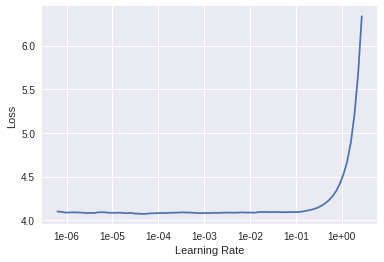

In [0]:
learner.recorder.plot()

In [0]:
from fastai.callbacks.tracker import SaveModelCallback
save_model = SaveModelCallback(learner, name='v4')
learner.fit_one_cycle(10, slice(1e-6), callbacks=[save_model], moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.102664,4.013232,0.261320
2,4.088895,4.013829,0.260555
3,4.080755,4.009872,0.260204
4,4.086848,4.014113,0.260842
5,4.080660,4.014120,0.260332
6,4.077578,4.014396,0.259885
7,4.082696,4.011841,0.261193
8,4.079952,4.013976,0.260300
9,4.079693,4.014957,0.260140
10,4.081597,4.016545,0.260778


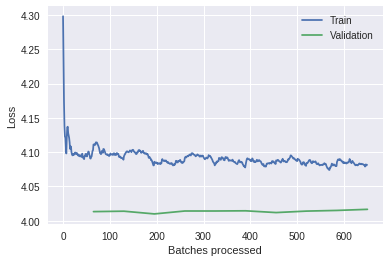

In [0]:
learner.recorder.plot_losses()

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


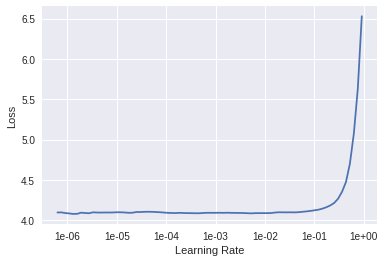

In [0]:
learner.recorder.plot()

In [0]:
learner.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


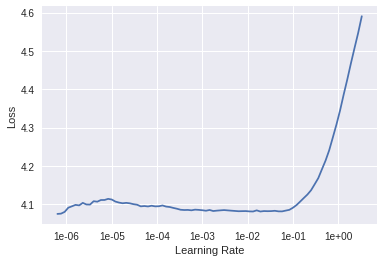

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
save_model = SaveModelCallback(learner, name='v5')
learner.fit_one_cycle(10, slice(1e-3,1e-2), callbacks=[save_model], moms=(0.8, 0.7))

epoch,train_loss,valid_loss,accuracy
1,4.074883,3.995382,0.263138
2,4.052549,3.987974,0.263616
3,4.006487,3.990150,0.265466
4,3.943779,3.988978,0.266103
5,3.870129,4.005164,0.267985
6,3.781030,4.004677,0.267666
7,3.702249,4.003677,0.267188
8,3.637039,4.007544,0.270281
9,3.584649,4.014057,0.270695
10,3.551282,4.014287,0.269994


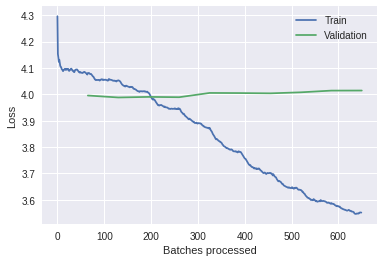

In [0]:
learner.recorder.plot_losses()

In [0]:
learner = language_model_learner(data, pretrained_model=URLs.WT103_1)

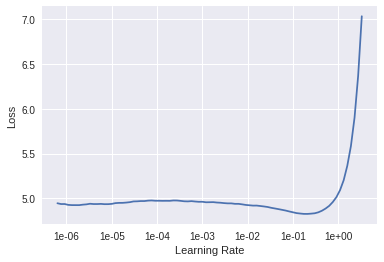

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
# Note to self: 0.2704 on the first iteration with WT103_1 vs 0.226690 with WT103
save_model = SaveModelCallback(learner, name='b_v1')
learner.fit_one_cycle(10, max_lr=1e-02, callbacks=[save_model])

epoch,train_loss,valid_loss,accuracy
1,4.860539,4.129927,0.270472
2,4.628833,3.965421,0.274936
3,4.375402,3.869598,0.276881
4,4.200552,3.872550,0.275255
5,4.052943,3.885241,0.271811
6,3.954234,3.888117,0.272226
7,3.868746,3.885954,0.274394
8,3.810172,3.882385,0.275925
9,3.761908,3.884431,0.274649
10,3.746352,3.881443,0.274872


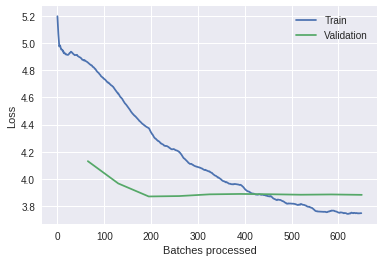

In [0]:
learner.recorder.plot_losses()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


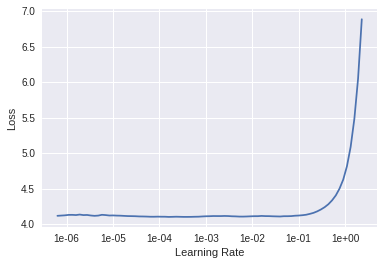

In [0]:
learner.lr_find()

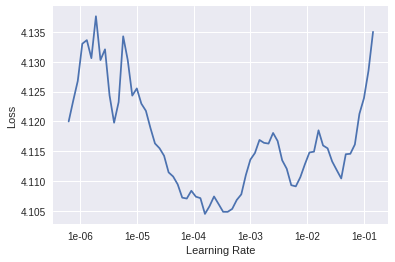

In [0]:
learner.recorder.plot(skip_end=20)

In [0]:
# Note to self: lesson notes are overfitting much faster, probably drop_mult=0.3 helps with that
save_model = SaveModelCallback(learner, name='b_v2')
learner.fit_one_cycle(20, max_lr=1e-04, callbacks=[save_model])

epoch,train_loss,valid_loss,accuracy
1,4.101853,3.872944,0.275765
2,4.107216,3.867020,0.276594
3,4.109681,3.866279,0.276212
4,4.103440,3.865958,0.276531
5,4.092778,3.861855,0.276881
6,4.088135,3.864471,0.277615
7,4.087556,3.863752,0.277264
8,4.099064,3.859630,0.277136
9,4.089383,3.856045,0.277679
10,4.074719,3.857870,0.276881


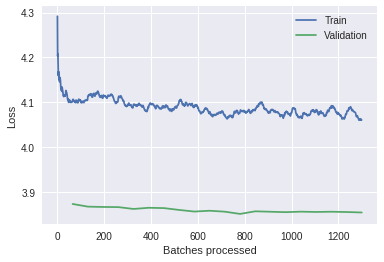

In [0]:
learner.recorder.plot_losses()

In [0]:
learner.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


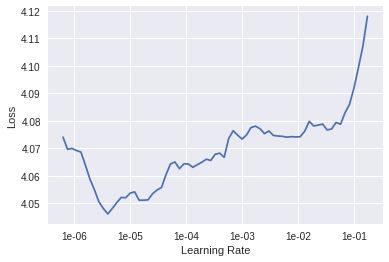

In [0]:
learner.recorder.plot(skip_end=20)

In [0]:
learner.load('b_v2')
learner.freeze_to(-2)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


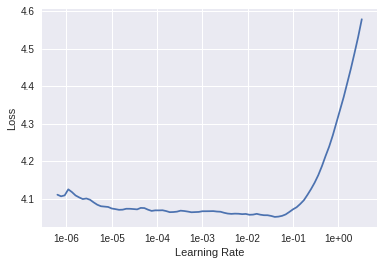

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
save_model = SaveModelCallback(learner, name='b_v3')
learner.fit_one_cycle(20, max_lr=1e-02, callbacks=[save_model])

epoch,train_loss,valid_loss,accuracy
1,4.053201,3.842267,0.277742
2,4.014865,3.836962,0.279273
3,3.968131,3.855711,0.277487
4,3.911630,3.882668,0.275861
5,3.855246,3.901752,0.275606
6,3.789656,3.932232,0.274426
7,3.721070,3.952036,0.270089
8,3.641245,3.985650,0.269196
9,3.564282,3.986219,0.269643
10,3.499131,3.998752,0.270918


KeyboardInterrupt: ignored

In [0]:
learner = language_model_learner(data, pretrained_model=URLs.WT103_1)
learner.load('b_v3')
learner.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


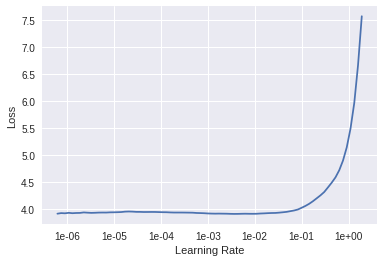

In [0]:
learner.lr_find()
learner.recorder.plot()

In [0]:
save_model = SaveModelCallback(learner, name='b_v4')
learner.fit_one_cycle(10, slice(1e-5, 1e-03), callbacks=[save_model])

epoch,train_loss,valid_loss,accuracy
1,3.932410,3.834465,0.278890
2,3.925813,3.825537,0.279911
3,3.894771,3.822300,0.281505
4,3.866200,3.820708,0.279687
5,3.841512,3.816581,0.282175
6,3.812085,3.811804,0.282239
7,3.785732,3.811688,0.281888
8,3.774028,3.814214,0.280995
9,3.760274,3.811297,0.282430
10,3.759335,3.812339,0.281569


In [0]:
learner.load('b_v4')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList
y: LMLabel (900 items)
[Category 0, Category 0, Category 0, Category 0, Category 0]...
Path: .
x: LMTextList (900 items)
[Text xxbos xxbos xxmaj un - xxunk - believable ! xxmaj xxunk xxmaj ryan does n't even look her usual xxunk lovable self in this , which normally makes me forgive her shallow xxunk acting xxunk . xxmaj hard to believe she was the producer on this dog . xxmaj plus xxmaj kevin xxmaj kline : what kind of suicide trip has his career been on ? xxmaj xxunk ... xxmaj xxunk ! ! ! xxmaj finally this was directed by the guy who did xxmaj big xxmaj xxunk ? xxmaj must be a replay of xxmaj jonestown - hollywood style . xxmaj xxunk !, Text xxbos xxbos xxmaj this is a extremely well - made film . xxmaj the acting , script and camera - work are all first - rate . xxmaj the music is good , too , though it is mostly early in the film , when things are still relatively xxunk . xxmaj there are no really xxunk in the cast , though s

In [0]:
learner.validate()

[3.8014874, tensor(0.2833)]

In [0]:
learner.save('learner')

In [0]:
help(learner)

Help on LanguageLearner in module fastai.text.learner object:

class LanguageLearner(RNNLearner)
 |  Subclass of RNNLearner for predictions.
 |  
 |  Method resolution order:
 |      LanguageLearner
 |      RNNLearner
 |      fastai.basic_train.Learner
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  predict(self, text:str, n_words:int=1, no_unk:bool=True, temperature:float=1.0, min_p:float=None)
 |      Return the `n_words` that come after `text`.
 |  
 |  show_results(self, ds_type=<DatasetType.Valid: 2>, rows:int=5, max_len:int=20)
 |      Show `rows` result of predictions on `ds_type` dataset.
 |  
 |  ----------------------------------------------------------------------
 |  Methods inherited from RNNLearner:
 |  
 |  __init__(self, data:fastai.basic_data.DataBunch, model:torch.nn.modules.module.Module, bptt:int=70, split_func:Union[Callable[[torch.nn.modules.module.Module], List[torch.nn.modules.module.Module]], NoneType]=None, clip:float=None, alpha:float=2.0, bet

In [0]:
ls models

b_v1.pth  b_v4.pth  fine_tuned_encoder.pth  tmp.pth  v3.pth
b_v2.pth  b_v5.pth  fine_tuned_enc.pth      v1.pth   v4.pth
b_v3.pth  fff.pth   learner.pth             v2.pth   v5.pth


In [0]:
# this is hackish but I've implicitly used '.' as a path in the _from_df above
!cp ./models/fine_tuned_encoder.pth /root/.fastai/data/imdb/models/fine_tuned_encoder.pth 

In [0]:
path = untar_data(URLs.IMDB)
path

PosixPath('/root/.fastai/data/imdb')

In [0]:
ls {path}

imdb.vocab  README  test/  tmp_clas/  tmp_lm/  train/  unsup/


In [0]:
# TODO: what would be the symptom of forgetting the vocab here
classification_data = TextList.from_folder(path, vocab=data.vocab)
type(classification_data)

fastai.text.data.TextList

In [0]:
classification_data = classification_data.split_by_folder(valid='test')
type(classification_data)

fastai.data_block.ItemLists

In [0]:
classification_data = classification_data.label_from_folder(classes=['neg', 'pos'])
type(classification_data)

fastai.data_block.LabelLists

In [0]:
classification_data = classification_data.databunch()
type(classification_data)

fastai.text.data.TextClasDataBunch

In [0]:
classification_data.show_batch()

In [0]:
classifier_learner = text_classifier_learner(classification_data, drop_mult=0.3)

In [0]:
classifier_learner.lr_find()

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


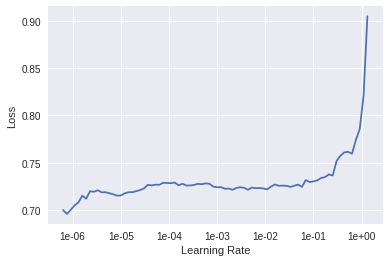

In [0]:
classifier_learner.recorder.plot()

In [0]:
classifier_learner.validate()

[0.69580275, tensor(0.5000)]

In [0]:
classifier_learner.load_encoder('fine_tuned_encoder')
classifier_learner.freeze()

In [0]:
classifier_learner.validate()

[0.6950263, tensor(0.5000)]

epoch,train_loss,valid_loss,accuracy


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


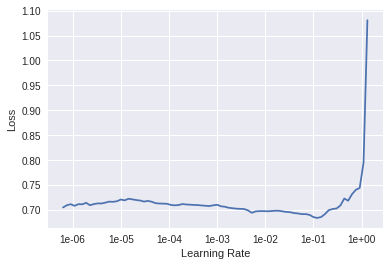

In [0]:
classifier_learner.lr_find()
classifier_learner.recorder.plot()

In [0]:
classifier_learner.save('initial_classifier')

In [0]:
classifier_learner.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.614895,0.469750,0.785880


In [0]:
"""Note to self: drop_mult matters for training speed, original(=1)

Total time: 10:41
epoch	train_loss	valid_loss	accuracy
1	0.614895	0.469750	0.785880

vs =0.5
Total time: 10:13
epoch	train_loss	valid_loss	accuracy
1	0.511064	0.384699	0.842400

v3 =0.3
epoch	train_loss	valid_loss	accuracy
1	0.476575	0.371440  0.836480
"""
classifier_learner.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.476575,0.371440,0.836480


In [0]:
classifier_learner.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.469716,0.355948,0.846600


In [0]:
classifier_learner.predict('Boy that was a movie!')

(Category pos, tensor(1), tensor([0.0725, 0.9275]))

In [0]:
classifier_learner.predict('Would never do that again!')

(Category neg, tensor(0), tensor([0.9240, 0.0760]))

In [0]:
classifier_learner.save('classifier_2')

In [0]:
classifier_learner.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy
1,0.458250,0.363004,0.841400
